# Imports 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline 

# Data

In [36]:
fish_file = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/Fish.csv'

In [37]:
fish_df = pd.read_csv(fish_file)

In [38]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [39]:
# 농어(perch) 데이터 
perch = fish_df[fish_df['Species'] == 'Perch']
perch.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [40]:
# 농어의 Length2로 Weight를 예측 
X = perch['Length2'].values.reshape((-1, 1))  # (1, 1) 모양의 2d 배열
y = perch['Weight'].values   # target: 1d 배열
# ML은 시리즈가 아닌 배열을 선택해줘야 한다

In [41]:
X.shape  # (n_samples, n_features)

(56, 1)

In [42]:
y.shape

(56,)

Train/Test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)

In [44]:
X_train.shape, y_train.shape

((42, 1), (42,))

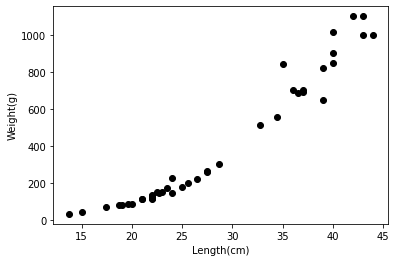

In [45]:
plt.scatter(X_train, y_train, color='black')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

# Polynomial을 이용한 LinearRegression

In [46]:
# 선형 회귀 결과를 시각화할 때 사용하기 위해서 
Xs = np.arange(14, 45, 0.001).reshape((-1, 1))  # predict() 메서드에서 사용할 수 있는 shape

In [47]:
def visualize_regression(estimator, X, y):
    Xs = np.arange(14, 45, 0.001).reshape((-1, 1))
    degrees = (1, 2, 5, 100)
    for d in degrees: 
        # 훈련 모델: Polynomial -> Scale -> L.R. 
        poly_features = PolynomialFeatures(degree=d, include_bias=False)
        std_scaler = StandardScaler()
        lin_reg = estimator
        model = Pipeline([('poly', poly_features),
                        ('scaler', std_scaler),
                        ('reg', lin_reg)])
        # 모델을 훈련 셋에 fitting(학습시킴)
        model.fit(X, y)
        # 회귀 훈련의 결과 
        print(model['reg'].coef_)

        # 회귀의 결과를 시각화하기 위한 y 값들 
        ys = model.predict(Xs)
        # 시각화 
        plt.plot(Xs, ys, label=f'degree={d}')

    # 훈련 데이터 시각화
    plt.scatter(X, y, color='black', alpha=0.5)

    plt.legend()
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.xlim((14, 45))
    plt.ylim((-200, 1400))
    plt.show()

[340.55381311]
[-188.16429447  532.30423546]
[ 1090.51349849 -4377.12096334  5960.80924384 -2038.47216236
  -298.04297802]
[ 2.00557630e+10 -2.58408022e+11  1.49532847e+12 -4.90418675e+12
  9.34291430e+12 -8.67392996e+12 -7.82611682e+11  7.69668003e+12
 -5.58109456e+09 -6.79558407e+12 -2.46010065e+12  4.99817517e+12
  5.20423172e+12 -1.63569143e+11 -5.04386991e+12 -4.58103039e+12
 -2.92727936e+11  3.58006339e+12  4.82124023e+12  2.56502444e+12
 -1.02653972e+12 -3.84050839e+12 -4.08225740e+12 -2.38407359e+12
  1.98148411e+11  2.61238310e+12  3.62406355e+12  3.27104682e+12
  1.54929950e+12 -4.44063972e+11 -2.07165132e+12 -3.00069992e+12
 -3.00183843e+12 -2.13789600e+12 -6.78418491e+11  7.14760716e+11
  2.02103482e+12  2.55576738e+12  2.52470076e+12  1.91395216e+12
  1.04869405e+12  8.39890755e+10 -9.16363136e+11 -1.73570552e+12
 -2.04897502e+12 -2.09658188e+12 -1.65299115e+12 -1.16987146e+12
 -4.25185309e+11  2.76530253e+11  9.12030793e+11  1.36269923e+12
  1.62030446e+12  1.62185850e+12

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


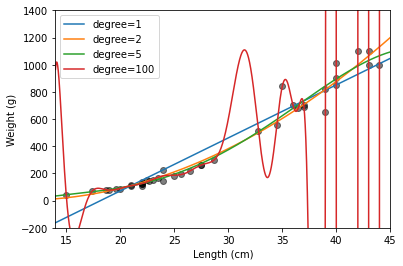

In [48]:
regressor = LinearRegression()  # 선형 회귀 모델 생성
visualize_regression(estimator=regressor, X=X_train, y=y_train)  # 함수 호출

## Ridge(l2) Regularization(규제) 효과  

[332.63395699]
[ 90.58971122 249.48800198]
[71.46390274 95.36902828 90.24481144 64.15690222 24.69095831]
[ 5.68458773e+01  7.11425789e+01  7.19548031e+01  6.42812775e+01
  5.23489678e+01  3.91902142e+01  2.67131342e+01  1.59431315e+01
  7.28932355e+00  7.73385834e-01 -3.79884638e+00 -6.72086082e+00
 -8.31296552e+00 -8.88121060e+00 -8.69698510e+00 -7.98930587e+00
 -6.94436388e+00 -5.70885132e+00 -4.39495875e+00 -3.08582633e+00
 -1.84079404e+00 -7.00133384e-01  3.10859884e-01  1.17842459e+00
  1.89750069e+00  2.46943497e+00  2.90014981e+00  3.19870069e+00
  3.37615470e+00  3.44473059e+00  3.41714966e+00  3.30615492e+00
  3.12416328e+00  2.88302224e+00  2.59384748e+00  2.26692283e+00
  1.91164759e+00  1.53651914e+00  1.14914171e+00  7.56253695e-01
  3.63767984e-01 -2.31792990e-02 -4.00174914e-01 -7.63472115e-01
 -1.10993364e+00 -1.43697553e+00 -1.74251269e+00 -2.02490700e+00
 -2.28291835e+00 -2.51565892e+00 -2.72255076e+00 -2.90328676e+00
 -3.05779501e+00 -3.18620626e+00 -3.28882457e+00 -

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


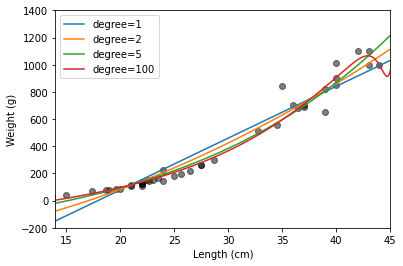

In [49]:
regressor = Ridge()
visualize_regression(regressor, X_train, y_train)

Ridge 규제는 고차항들의 계수를 작게 만들어서 곡선의 기울기 완만해지게 만들어 줌으로써, 더 일반화가 잘 되는(테스트 셋에서 더 좋은 점수가 나오는) 모델을 만들어 줌 

## Lasso(l1) Regularization(규제)의 효과

[339.55381311]
[-37.56688954 381.72140363]
[  0.         169.86798493 175.39652371   0.          -0.        ]
[  0.          63.2765925  268.72581206  29.02636369   0.
   0.           0.           0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -6.77634564
  -6.07574687  -5.17017489  -4.29993019  -3.4658082   -2.66828008
  -1.90753532  -1.18352019  -0.49597256  -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 761.342244306521, tolerance: 518.2793833333334
  positive)


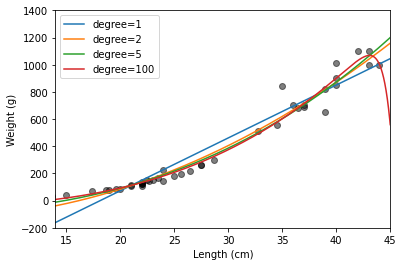

In [50]:
regressor = Lasso()
visualize_regression(regressor, X_train, y_train)

Lasso 규제는 중요하지 않은 고차항의 계수들을 0으로 만들어 줌으로써, 곡선을 완만하게 만들어서 일반화 성능을 높여주는(테스트 셋을 더 잘 예측하는) 모델을 만들어 줌 

## ElasticNet Regularization

[226.70254207]
[132.58403091 142.14452539]
[65.81871932 66.12553502 64.44511229 61.45264451 57.66069996]
[ 5.37266781e+01  5.02547097e+01  4.56276297e+01  4.04950707e+01
  3.52929284e+01  3.02982404e+01  2.56736771e+01  2.15003478e+01
  1.78033024e+01  1.45715607e+01  1.17731829e+01  9.36589058e+00
  7.30403328e+00  5.54281382e+00  4.04060776e+00  2.76004271e+00
  1.66831789e+00  7.37088409e-01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.27791529e-01 -5.90474953e-01
 -9.00842714e-01 -1.16612354e+00 -1.39237937e+00 -1.58470077e+00
 -1.74737049e+00 -1.88399987e+00 -1.99764224e+00 -2.09088710e+00
 -2.16593838e+00 -2.22467956e+00 -2.26872791e+00 -2.29947991e+00
 -2.31814926e+00 -2.32579877e+00 -2.32336730e+00 -2.31169228e+00
 -2.29152875e+00 -2.26356518e+00 -2.22843668e+00 -2.18673587e+00
 -2.13902157e+00 -2.08582576e+00 -2.02765877e+00 -1.96501303e+00
 -1.89836548e+00 -1.82817884e+00 -1.75490190e+00 -1.67896900e+00
 -1.60079893e+00 -1.52079329e+00 -1.43933470e+00 -

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


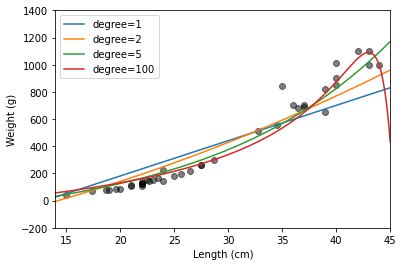

In [51]:
regressor = ElasticNet()
visualize_regression(regressor, X_train, y_train)

ElasticNet 규제는 Ridge(l2) 규제와 Lasso(l1) 규제의 효과를 모두 갖고 있습니다 

# Ridge(l2) Regularization

`y_hat = w0 + w1 * x`: 예측값 

`y`: 실제값

`MSE(w) = (1/N) * sum((y - y_hat)**2` 

선형 회귀(Linear Regression)의 목적은 MSE(Mean squared errors)를 최소화할 수 있는 계수 W(w0와 w1)를 찾는 것.

선형 회귀의 비용(손실) 함수는 MSE.

머신 러닝이란 비용 함수(cost function) 또는 손실 함수(loss function)를 최소화하는 값들(coefficient, 계수)을 찾는 알고리즘.

규제(regularization)란 계수들을 찾기 위한 비용(손실) 함수에 추가적인 에러항을 더 추가해서 비용(손실)을 더 늘려주는 것

**Ridge(l2) 규제**

Ridge의 비용(손실) 함수:
> $J(w) = MSE(w) + \alpha \times \mid\mid w \mid\mid ^2$

> 선형 회귀의 비용 함수 MSE(w)에 2차항을 손실을 추가 

> alpha: 비용(손실)을 얼마나 추가할 것인지를 결정하는 값. alpha이 작을 수록 선형 회귀의 결과와 비슷. alpha값이 커질 수록 규제가 강해짐

> 하이퍼파라미터(hyperparameter): 최적의 모델 파라미터 w를 찾기 위해서 튜닝하는 파라미터. Ridge 규제에서는 alpha 값이 하이퍼파라미터

Ridge 규제에서 alpha 값이 변할 때, 훈련 셋과 테스트 셋의 점수(R^2)가 어떻게 변하는지

In [72]:
def visualize_r2_score(estimator, X_train, y_train, X_test, y_test): 
    train_scores = []  # alpha값을 바꿀 때마다 계산된 훈련 셋의 점수를 저장 
    test_scores = []   # alpha값을 바꿀 때마다 계산된 테스트 셋의 점수를 저장 
    alphas = [10**x for x in range(-3, 3)]  # [0.001, 0.01, 0.1, 1, 10, 100]

    for a in alphas:
        # 머신 러닝 모델 생성 
        poly_features = PolynomialFeatures(degree=5, include_bias=False)
        std_scaler = StandardScaler()
        
        if estimator == 'ridge':
            regressor = Ridge(alpha=a)
        elif estimator == 'lasso':
            regressor = Lasso(alpha=a, max_iter=10_000)
        elif estimator == 'elastic':
            regressor = ElasticNet(alpha=a)
        else:
            raise ValueError('estimaotr는 "ridge", "lasso", "elastic"이어야 함!')

        model = Pipeline([('poly', poly_features),
                        ('scaler', std_scaler),
                        ('reg', regressor)])
        # 모델 학습 
        model.fit(X_train, y_train)
        # print(model['reg'].coef_) #> w1, w2, w3, w4, w5 
        # 훈련 셋 성능 평가 점수 
        train_sc = model.score(X_train, y_train)
        # 테스트 셋 성능 평가 점수 
        test_sc = model.score(X_test, y_test)
        # 리스트 추가
        train_scores.append(train_sc)
        test_scores.append(test_sc)

    print(train_scores)
    print(test_scores)

    plt.plot(np.log10(alphas), train_scores, 'bo-', label='train score')
    plt.plot(np.log10(alphas), test_scores, 'ro-', label='test score')

    plt.legend()
    plt.title(estimator)
    plt.show()

[0.9736543234476451, 0.9733770960543661, 0.9708464608091913, 0.9675257933461249, 0.9641329386626263, 0.8627487881080745]
[0.9798046964920932, 0.9789530910605557, 0.9764445172290547, 0.9665833996552661, 0.9733177545575481, 0.8976726580323618]


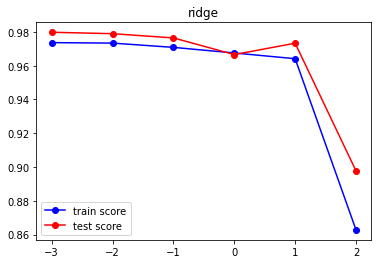

In [66]:
visualize_r2_score('ridge', X_train, y_train, X_test, y_test)

# Lasso(l1) Regularization 

**Lasso(l1) 규제**

비용(손실) 함수 

> $J(w) = MSE(w) + \alpha \times \mid\mid\ w \mid\mid$

> Lasso(l1) 규제의 손실 함수는 선형 회귀의 손실 함수에 $w$의 일차항을 더 추가한 것

[0.973460394711023, 0.9734472359261392, 0.973320902736392, 0.9692636157789122, 0.9684606645363231, 0.8880500221451817]
[0.9733123559011223, 0.973667918094972, 0.9796952223218407, 0.9718691066691287, 0.9750054278589299, 0.917866091243881]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60188.698263234284, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10694.452367101898, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 903.2099224114936, tolerance: 518.2793833333334
  positive)


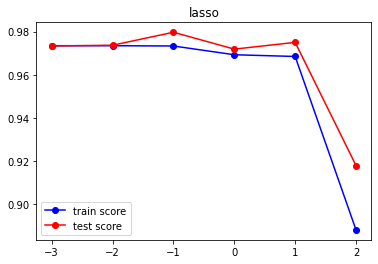

In [73]:
visualize_r2_score('lasso', X_train, y_train, X_test, y_test)

# ElasticNet Regularization

**ElasticNet 규제**

비용(손실) 함수

> $J(w) = MSE(w) + r \alpha \mid\mid w \mid\mid + \frac{1 - r}{2} \alpha \mid\mid w \mid\mid ^2$

> 선형 회귀 비용(손실) 함수에 l1 규제와 l2 규제를 추가한 것

> alpha: 규제의 크기

> r: l1 규제의 비율. 0 <= r <= 1. l2 규제의 비율은 1-r 

[0.9729318909719307, 0.9694267645740603, 0.9669667595405637, 0.9574099753809557, 0.7128959260018337, 0.1419437414816156]
[0.9792791927855977, 0.9717021238527076, 0.9675102498277163, 0.9741613969257316, 0.7439362036454651, 0.10755935075190703]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73193.66132866153, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868.8427452529431, tolerance: 518.2793833333334
  positive)


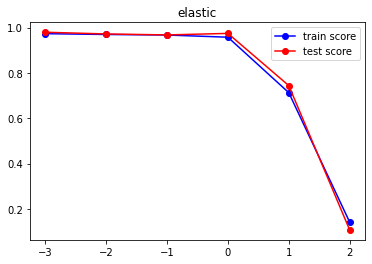

In [74]:
visualize_r2_score('elastic', X_train, y_train, X_test, y_test)

# 연습 

* fish 데이터프레임에서 Length2, Height, Width 컬럼을 독립 변수 (컬럼 3개 자리 넘파이 배열)
* fish 데이터프레임에서 Weight를 target
* train/test 분리 
* LinearRegression에서 2차 polynomial과 5차 polynomial(degree=5)일 때 R^2 점수를 계산해서 비교 (overfittin이 나타날텐데, R^2 score만으로도 알아낼 수 있음)
* Ridge, Lasso, ElasticNet에서 가장 적절한 alpha 값을 찾으세요 


In [76]:
# fish 데이터프레임에서 Length2, Height, Width 컬럼을 독립 변수 (컬럼 3개 자리 넘파이 배열)
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [106]:
X = perch[['Length2', 'Height', 'Width']].values.copy()
y = perch['Weight'].values

In [107]:
X[:5]

array([[ 8.4   ,  2.112 ,  1.408 ],
       [13.7   ,  3.528 ,  1.9992],
       [15.    ,  3.824 ,  2.432 ],
       [16.2   ,  4.5924,  2.6316],
       [17.4   ,  4.588 ,  2.9415]])

In [108]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)

In [109]:
X_train.shape, y_train.shape

((42, 3), (42,))

degree=2 LinearRegression()

In [111]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
std_scaler = StandardScaler()
regressor = LinearRegression()

model = Pipeline([('poly', poly_features),
                  ('scaler', std_scaler),
                  ('reg', regressor)])
# 모델 학습 
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [112]:
model['reg'].coef_

array([  302.88147491,  -256.15985953,  -319.04536489, -1190.10114932,
        1420.82047815,   895.60226454,  1388.32625993, -3607.57864766,
        1721.32152979])

In [114]:
model['poly'].get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [115]:
# 훈련 셋 성능 평가 점수 
train_sc = model.score(X_train, y_train)
# 테스트 셋 성능 평가 점수 
test_sc = model.score(X_test, y_test)

print(f'2차 polynomial')
print(f'훈련 셋 스코어: {train_sc}')
print(f'테스트 셋 스코어: {test_sc}')

2차 polynomial
훈련 셋 스코어: 0.99035576703127
테스트 셋 스코어: 0.9712376207461842


degree=5 LinearRegression 

In [116]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
std_scaler = StandardScaler()
regressor = LinearRegression()

model = Pipeline([('poly', poly_features),
                  ('scaler', std_scaler),
                  ('reg', regressor)])
# 모델 학습 
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [120]:
len(model['poly'].get_feature_names())

55

In [124]:
model['reg'].coef_

array([-3.23821845e+05,  2.69350715e+04,  1.04193507e+05,  9.08325652e+05,
        2.32454331e+06, -5.04495515e+05,  2.48923475e+06, -7.96494120e+06,
        3.73255927e+06,  9.03253061e+06, -3.30380422e+07, -5.62259702e+06,
        1.78957817e+07,  2.48531129e+07, -3.30868720e+06, -1.42884128e+07,
        8.38164060e+06,  4.91016262e+05, -6.36564258e+06, -1.04573396e+07,
        2.99615357e+07,  1.28459877e+06, -1.27080976e+06, -3.13929438e+06,
        1.85666424e+06, -1.37312337e+07, -7.53920412e+06, -2.12286157e+07,
        8.15627322e+06,  1.55621520e+07, -1.78561584e+06, -7.35283213e+06,
        8.96145632e+06,  2.57170218e+06, -1.15191024e+07,  1.81694465e+07,
        1.33124465e+07, -1.35191955e+07, -5.13521672e+06,  1.24994271e+05,
       -1.67972493e+07,  3.45411793e+06, -2.09394021e+07, -3.15965076e+06,
        1.25467165e+07,  3.01724049e+07,  9.70919119e+06, -4.98196548e+06,
        9.64401326e+06, -5.67248587e+06, -8.68739513e+06, -7.88673220e+06,
        2.15743620e+05,  

In [125]:
# 훈련 셋 성능 평가 점수 
train_sc = model.score(X_train, y_train)
# 테스트 셋 성능 평가 점수 
test_sc = model.score(X_test, y_test)

print(f'5차 polynomial')
print(f'훈련 셋 스코어: {train_sc}')
print(f'테스트 셋 스코어: {test_sc}')

5차 polynomial
훈련 셋 스코어: 1.0
테스트 셋 스코어: -340.4283462931642


Ridge 규제

[0.9930679875694958, 0.9918120087949405, 0.990404845594141, 0.9896217956447124, 0.9887366307205132, 0.9841994538470814]
[0.9560293715537606, 0.9796497117195108, 0.9826465162736779, 0.9788853860988018, 0.9722857046398282, 0.9624191421271443]


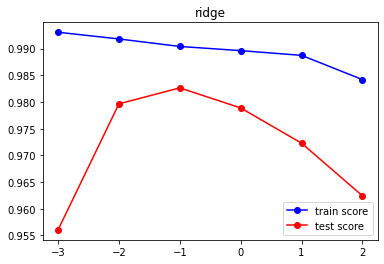

In [126]:
visualize_r2_score('ridge', X_train, y_train, X_test, y_test)

Lasso 규제

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18721.489838501155, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13004.41719344784, tolerance: 518.2793833333334
  positive)


[0.9925196861132805, 0.9923253689781225, 0.9902345414665709, 0.9898226808884522, 0.9887718361620609, 0.9078694930826312]
[0.972540834048817, 0.975615552991362, 0.9823407613795332, 0.980024557141601, 0.9828878177337759, 0.9090045626522507]


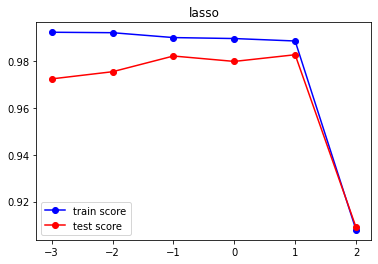

In [95]:
visualize_r2_score('lasso', X_train, y_train, X_test, y_test)

Elastic 규제

[0.9907876110922201, 0.9900918923691824, 0.9894550696878179, 0.9878615126729345, 0.9758019075033209, 0.6787621701045488]
[0.9834093561287038, 0.9818195453308984, 0.9779822034079118, 0.9684838895840707, 0.9610194241457921, 0.6869147423893729]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24416.716930243067, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23222.463989046624, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12051.502580090993, tolerance: 518.2793833333334
  positive)


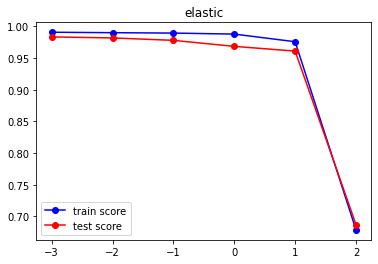

In [96]:
visualize_r2_score('elastic', X_train, y_train, X_test, y_test)

* 회귀(Regression):
    * load_boston() 함수로 데이터 셋을 고드
    * LineareRegression, Ridge, Lasso, ElasticNet 클래스 사용
    * 각 모델의 성능 비교
* 분류(Classification):
    * load_breast_cancer() 함수로 데이터 셋을 로드
    * KNeighborsClassifier, LogisticRegression, SGDClassifier, DecisionTreeClassifier 클래스 사용
    * 각 모델의 성능 비교 